# Bitcoins Data

## Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
bitcoin = pd.read_csv("Bitcoin Historical Data.csv")
bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/10/2024,"76,782.7","76,681.4","77,055.8","76,520.5",76.00K,0.11%
1,11/09/2024,"76,700.3","76,506.1","76,904.0","75,732.5",72.97K,0.24%
2,11/08/2024,"76,517.3","75,869.8","77,188.5","75,599.0",155.17K,0.85%
3,11/07/2024,"75,868.6","75,585.5","76,837.8","74,448.2",184.16K,0.37%
4,11/06/2024,"75,586.3","69,374.1","76,401.4","69,323.0",357.28K,8.96%


In [70]:
bitcoin.shape

(3967, 7)

In [71]:
bitcoin.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,11/10/2024,"76,782.7","76,681.4","77,055.8","76,520.5",76.00K,0.11%
1,11/09/2024,"76,700.3","76,506.1","76,904.0","75,732.5",72.97K,0.24%
2,11/08/2024,"76,517.3","75,869.8","77,188.5","75,599.0",155.17K,0.85%
3,11/07/2024,"75,868.6","75,585.5","76,837.8","74,448.2",184.16K,0.37%
4,11/06/2024,"75,586.3","69,374.1","76,401.4","69,323.0",357.28K,8.96%
5,11/05/2024,"69,373.7","67,848.3","70,495.6","67,473.6",108.95K,2.25%
6,11/04/2024,"67,848.8","68,770.3","69,483.4","66,834.0",101.31K,-1.34%
7,11/03/2024,"68,769.6","69,334.8","69,383.6","67,514.2",83.16K,-0.80%
8,11/02/2024,"69,325.8","69,499.3","69,896.9","69,029.0",38.72K,-0.26%
9,11/01/2024,"69,507.2","70,278.7","71,598.4","68,846.0",130.46K,-1.10%


In [88]:
bitcoin.isna().sum()

Date                  0
Price                 0
Open                  0
High                  0
Low                   0
Volume in Millions    0
Change in decimals    0
dtype: int64

## Data Cleaning

### Convert Volume
Volume is in format "108.95K" or "2.31B" or "239.34M". 
Here the last characters like:
* K -- represents Thousands
* M -- represents Millions
* B -- represents Billions

Hence we convert each value into Millions

In [72]:
bitcoin = bitcoin.rename(columns= {'Vol.':"Volume in Millions"})

In [73]:
def convert_to_millions(volume):
    number = float(volume[:-1])
    value = volume[-1]
    if value == "K":
        return round((number / 1000),4)
    elif value == "M":
        return number
    elif value == "B":
        return (number * 1000)

bitcoin['Volume in Millions'] = bitcoin["Volume in Millions"].apply(convert_to_millions)


### Convert Date

In [78]:
bitcoin['Date']= pd.to_datetime(bitcoin['Date'])

In [79]:
bitcoin

,Date,Price,Open,High,Low,Volume in Millions,Change %
0,2024-11-10,"76,782.7","76,681.4","77,055.8","76,520.5",0.0760,0.11%
1,2024-11-09,"76,700.3","76,506.1","76,904.0","75,732.5",0.0730,0.24%
2,2024-11-08,"76,517.3","75,869.8","77,188.5","75,599.0",0.1552,0.85%
3,2024-11-07,"75,868.6","75,585.5","76,837.8","74,448.2",0.1842,0.37%
4,2024-11-06,"75,586.3","69,374.1","76,401.4","69,323.0",0.3573,8.96%
...,...,...,...,...,...,...,...
3962,2014-01-05,"1,014.7",924.7,"1,029.9",911.4,0.0214,9.74%
3963,2014-01-04,924.7,884.3,932.2,848.3,0.0142,4.57%
3964,2014-01-03,884.3,856.9,888.2,839.4,0.0097,3.19%
3965,2014-01-02,856.9,815.9,886.2,810.5,0.0128,5.02%


In [80]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3967 non-null   datetime64[ns]
 1   Price               3967 non-null   object        
 2   Open                3967 non-null   object        
 3   High                3967 non-null   object        
 4   Low                 3967 non-null   object        
 5   Volume in Millions  3967 non-null   float64       
 6   Change %            3967 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 217.1+ KB


### Convert Floats

In [82]:
bitcoin['Price'] = bitcoin['Price'].str.replace(',','')
bitcoin['Open'] = bitcoin['Open'].str.replace(',','')
bitcoin['High'] = bitcoin['High'].str.replace(',','')
bitcoin['Low'] = bitcoin['Low'].str.replace(',','')

In [83]:
bitcoin['Price'] = pd.to_numeric(bitcoin['Price'], errors= 'coerce')
bitcoin['Open'] = pd.to_numeric(bitcoin['Open'], errors= 'coerce')
bitcoin['High'] = pd.to_numeric(bitcoin['High'], errors= 'coerce')
bitcoin['Low'] = pd.to_numeric(bitcoin['Low'], errors= 'coerce')

In [84]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3967 non-null   datetime64[ns]
 1   Price               3967 non-null   float64       
 2   Open                3967 non-null   float64       
 3   High                3967 non-null   float64       
 4   Low                 3967 non-null   float64       
 5   Volume in Millions  3967 non-null   float64       
 6   Change %            3967 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 217.1+ KB


### Convert Percents

In [85]:
bitcoin = bitcoin.rename(columns= {'Change %':'Change in decimals'})

In [86]:
def percent_to_decimal(value):
    number = float(value[:-1])
    return number/100

bitcoin['Change in decimals'] = bitcoin['Change in decimals'].apply(percent_to_decimal)
bitcoin.head()

,Date,Price,Open,High,Low,Volume in Millions,Change in decimals
0,2024-11-10,76782.7,76681.4,77055.8,76520.5,0.0760,0.0011
1,2024-11-09,76700.3,76506.1,76904.0,75732.5,0.0730,0.0024
2,2024-11-08,76517.3,75869.8,77188.5,75599.0,0.1552,0.0085
3,2024-11-07,75868.6,75585.5,76837.8,74448.2,0.1842,0.0037
4,2024-11-06,75586.3,69374.1,76401.4,69323.0,0.3573,0.0896


In [87]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3967 non-null   datetime64[ns]
 1   Price               3967 non-null   float64       
 2   Open                3967 non-null   float64       
 3   High                3967 non-null   float64       
 4   Low                 3967 non-null   float64       
 5   Volume in Millions  3967 non-null   float64       
 6   Change in decimals  3967 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 217.1 KB


In [89]:
bitcoin.describe()

,Date,Price,Open,High,Low,Volume in Millions,Change in decimals
count,3967,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,2019-06-07 00:00:00,17347.150819,17328.072826,17734.578170,16896.889161,15.568688,0.002565
min,2014-01-01 00:00:00,111.600000,111.600000,160.100000,91.700000,0.000300,-0.572100
25%,2016-09-18 12:00:00,699.400000,699.400000,712.900000,681.750000,0.046100,-0.012900
50%,2019-06-07 00:00:00,8407.000000,8404.900000,8631.700000,8135.000000,0.092000,0.001000
75%,2022-02-22 12:00:00,28635.150000,28564.200000,29196.650000,28087.400000,0.261800,0.016900
max,2024-11-10 00:00:00,76782.700000,76681.400000,77188.500000,76520.500000,4470.000000,3.368400
std,NaN,20158.249719,20137.865037,20585.452112,19665.632982,173.734485,0.069476


In [96]:
bitcoin.duplicated().sum()

np.int64(0)

## Analysis

In [100]:
bitcoin.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume in Millions',
       'Change in decimals'],
      dtype='object')

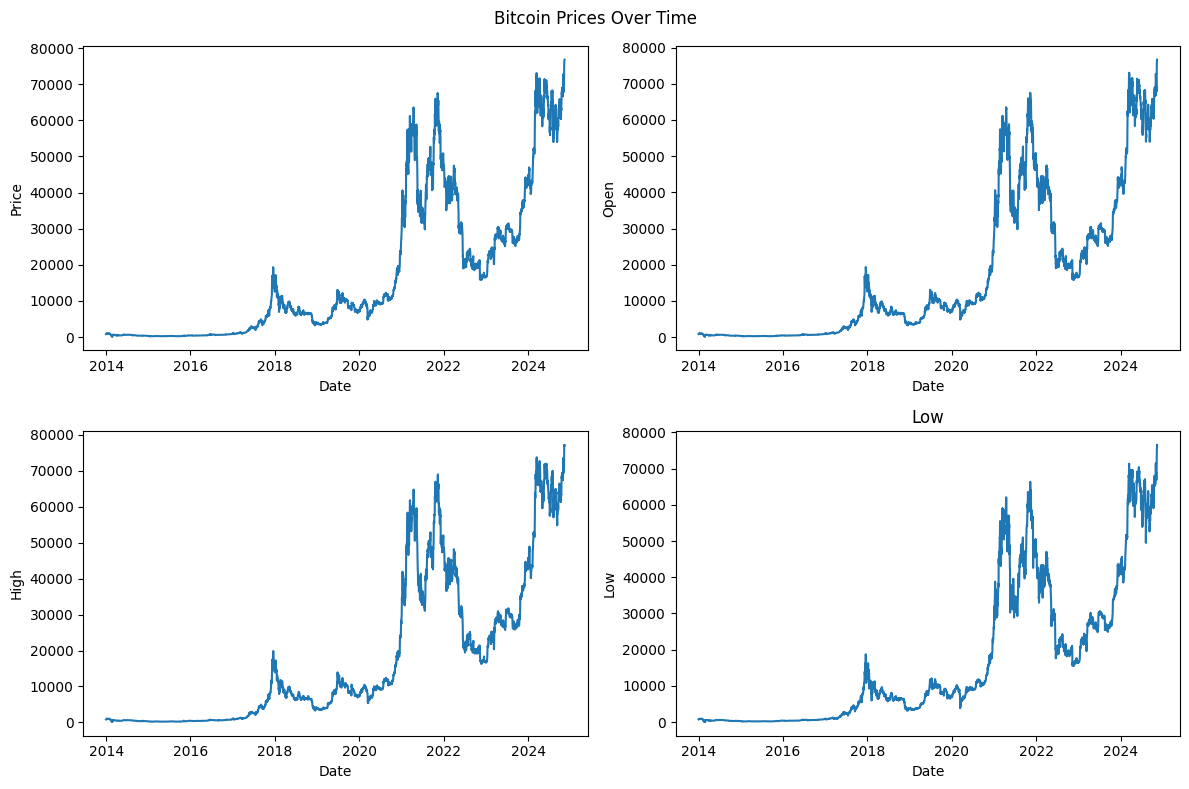

In [115]:
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(12,8))
for index, column in enumerate(['Price', 'Open', 'High', 'Low']):
        nrow = index // 2
        ncol = index % 2
        sns.lineplot(data = bitcoin, x= 'Date', y= column, ax= axes[nrow][ncol])
        plt.title(f'{column}')

plt.suptitle("Bitcoin Prices Over Time")
plt.tight_layout()
plt.show()

<Axes: xlabel='Date', ylabel='Price'>

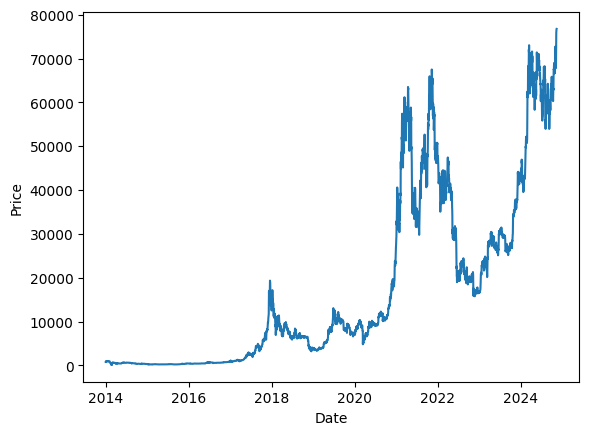

In [98]:
sns.lineplot(data = bitcoin, x = 'Date', y='Price')

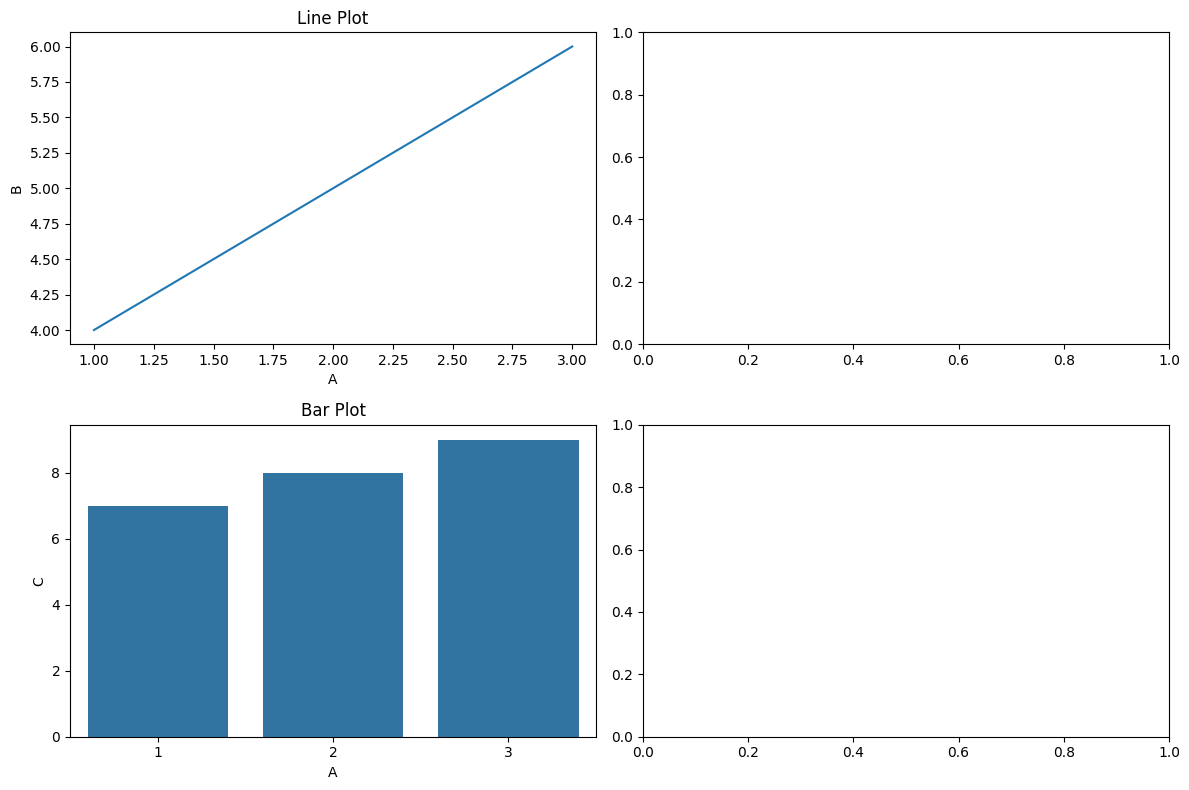

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot on the first subplot
sns.lineplot(data=df, x='A', y='B', ax=axes[0][0])
axes[0][0].set_title('Line Plot')

# Plot on the second subplot
sns.barplot(data=df, x='A', y='C', ax=axes[1][0])
axes[1][0].set_title('Bar Plot')

plt.tight_layout()
plt.show()